# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Dimas Pangestu Aji Purnomo
- **Email:** dimaspurnomo610@yahoo.com
- **ID Dicoding:** gh4nd4

## Menentukan Pertanyaan Bisnis

- Kategori produk apa saja yang sedang populer sehingga dapat direkomendasikan sebagai top 5 rekomendari produk di halaman utama website agar pembeli tertarik membelinya pada 3 bulan terakhir?

- Bagaimana perilaku pembeli selama 3 bulan terakhir agar kita bisa mengambil tindakan terhadap jenis-jenis perilaku tersebut?

## Import Semua Packages/Library yang Digunakan

Pada *project* ini menggunakan beberapa Packages/Library untuk melakukan analisa pada data, seperti Pandas, Numpy, Zipfile, dan Matplotlib pada notebook ini. Berikut merupakan fungsi masing-masing dari Packages/Library yang dipakai.

1. Pandas digunakan untuk mengubah dataset menjadi dataframe agar bisa diolah lebih mudah. Baik untuk mengolah data kategorikal dan numerikal.
2. Numpy digunakan untuk mengolah data numerikal, khususnya pada bentuk tensor.
3. Zipfile digunakan untuk mengekstrak data untuk format ZIP
4. Matplotlib digunakan untuk memvisualisasikan data yang sudah diolah agar dapat diinterpretasikan dengan mudah.

In [ ]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt

Karena data yang digunakan disimpan di Google Drive maka diperlukan library bernama googla.colab untuk melakukan *mounting*.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

**Extraksi file ZIP**

Diketahui bahwa file yang telah diunduh merupakan file yang berformat ZIP sehingga perlu untuk melakukan ekstraksi. Oleh karena itu, library Zipfile akan melakukannya dan menaruhnya pada path "/content".

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/E-commerce-public-dataset.zip') as f:
  f.extractall('/content')

Setelah melakukan ekstraksi file, terdapat 9 dataset yang dihasilkan dengan format CSV.

**Memuat Data dengan Pandas**

Berdasarkan pertanyaan bisnis yang sudah diajukan, tidak semua data akan dipakai karena permasalahan yang ingin kita selesaikan bergantung pada hal-hal yang berbau dengan customer, order, product, dan seller. Namun, kita perlu melakukan pemuatan data dari yang berformat CSV menjadi dataframe.

In [ ]:
df_customer = pd.read_csv('/content/E-Commerce Public Dataset/customers_dataset.csv')
df_order_item = pd.read_csv('/content/E-Commerce Public Dataset/order_items_dataset.csv')
df_order_pay = pd.read_csv('/content/E-Commerce Public Dataset/order_payments_dataset.csv')
df_order = pd.read_csv('/content/E-Commerce Public Dataset/orders_dataset.csv')
df_product_cat = pd.read_csv('/content/E-Commerce Public Dataset/product_category_name_translation.csv')
df_product = pd.read_csv('/content/E-Commerce Public Dataset/products_dataset.csv')
df_seller = pd.read_csv('/content/E-Commerce Public Dataset/sellers_dataset.csv')

**Merging Data Berdasarkan Foreign Key & Primary Key**

Karena dataframe yang dimuat cukup banyak, tidak mungkin untuk melakukan pengecekan tiap dataframe dan ini tidak efisien. Oleh karena itu, perlu melakukan teknik "JOIN" untuk mempermudah melakukan kueri dan melihat relasinya. Untuk mengetahui hubungan antar dataframe dapat dilihat pada "Brazilian E-Commerce Public Dataset by Olist" di kaggle.com.

In [ ]:
order_id1 = pd.merge(left=df_order_pay,
                     right=df_order,
                     how="inner",
                     left_on="order_id",
                     right_on="order_id")

customer_id = pd.merge(left=df_order,
                       right=df_customer,
                       how="inner",
                       left_on="customer_id",
                       right_on="customer_id")

order_id2 = pd.merge(left=df_order,
                     right=df_order_item,
                     how="inner",
                     left_on="order_id",
                     right_on="order_id")

product_id = pd.merge(left=df_product,
                      right=df_order_item,
                      how="inner",
                      left_on="product_id",
                      right_on="product_id")

seller_id = pd.merge(left=df_seller,
                     right=df_order_item,
                     how="inner",
                     left_on="seller_id",
                     right_on="seller_id")

Setelah melakukan Join antar dataframe, kita bisa melihat bagaimana kondisi data secara kasar pada tahap "Checking Data".

**Checking Data**

In [ ]:
order_id1

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04 00:00:00
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaN,NaN,2017-12-05 00:00:00
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24 00:00:00


In [ ]:
customer_id

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
order_id2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [ ]:
product_id

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


In [ ]:
seller_id

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89
...,...,...,...,...,...,...,...,...,...,...
112645,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,7aa50aad959e4345b45b9732bc346a6e,1,e891d4a9622cae3b9fc2ec558bda155b,2017-03-10 04:03:43,27.00,16.05
112646,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,aae373a2cc64ed2d1f262aa56e70b7e8,1,e891d4a9622cae3b9fc2ec558bda155b,2017-02-15 16:42:59,27.00,10.96
112647,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,bc34d5b185152cb88b9f5db391dcd1cb,1,e891d4a9622cae3b9fc2ec558bda155b,2017-04-11 18:05:17,27.00,16.05
112648,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,d1edb80f6670902ebbb11765b96873da,1,e891d4a9622cae3b9fc2ec558bda155b,2017-06-26 17:30:16,27.00,12.48


Hasil dari pemeriksaan data adalah teknik join membuat dataframe baru dengan jumlah row yang berbeda. Selain itu, dengan teknik tersebut membuat jumlah kolom juga bertambah.

**Deskripsi Data**

Sebelum melakukan tahap selanjutnya, alangkah baiknya mengetahui bagaimana data yang akan kita olah. Oleh karena itu, library Pandas memudahkan untuk melihat tipe data apa saja yang ada pada dataframe dan apakah terdapat Null Value di dalamnya.

In [ ]:
order_id1.info()
print('\n')
customer_id.info()
print('\n')
order_id2.info()
print('\n')
product_id.info()
print('\n')
seller_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103886 non-null  object 
 1   payment_sequential             103886 non-null  int64  
 2   payment_type                   103886 non-null  object 
 3   payment_installments           103886 non-null  int64  
 4   payment_value                  103886 non-null  float64
 5   customer_id                    103886 non-null  object 
 6   order_status                   103886 non-null  object 
 7   order_purchase_timestamp       103886 non-null  object 
 8   order_approved_at              103711 non-null  object 
 9   order_delivered_carrier_date   101998 non-null  object 
 10  order_delivered_customer_date  100754 non-null  object 
 11  order_estimated_delivery_date  103886 non-null  object 
dtypes: float64(1), int64(2), objec

Diketahui bahwa masing-masing dataframe memiliki data bertipe Float, Integer, dan Object. Data bertipe Object disini antara lain adalah String dan Datetime. Pada tahap ini juga masih belum ditemukan null value dan permasalahan lainnya.

**Insight:**
- Untuk menjawab pertanyaan yang sudah didefinisikan maka data yang diperlukan adalah data yang bertipe object (datetime dan string), integer, dan float sehingga dataset yang digunakan adalah data customer, orders, order payments, order items, product, product cateogry, dan seller.
- Karena data yang akan dianalisa berada pada dataset yang berbeda sehingga diperlukan merging untuk mempermudah kueri.

### Assesing Data

Pada tahap ini akan dilakukan penilaian kualitas terhadap data yang akan dipakai. Tahapan yang akan dilakukan antara lain adalah apakah terdapat missing value, data yang duplikat, dan outlier.

**Memeriksa Missing Value**

Pada tahap ini akan dilakukan pemeriksaan apakah terdapat missing value pada dataset yang sudah dilakukan join sebelumnya.

In [ ]:
(order_id1.isnull().sum(), customer_id.isnull().sum(), order_id2.isnull().sum(),
product_id.isnull().sum(), seller_id.isnull().sum())

(order_id                            0
 payment_sequential                  0
 payment_type                        0
 payment_installments                0
 payment_value                       0
 customer_id                         0
 order_status                        0
 order_purchase_timestamp            0
 order_approved_at                 175
 order_delivered_carrier_date     1888
 order_delivered_customer_date    3132
 order_estimated_delivery_date       0
 dtype: int64,
 order_id                            0
 customer_id                         0
 order_status                        0
 order_purchase_timestamp            0
 order_approved_at                 160
 order_delivered_carrier_date     1783
 order_delivered_customer_date    2965
 order_estimated_delivery_date       0
 customer_unique_id                  0
 customer_zip_code_prefix            0
 customer_city                       0
 customer_state                      0
 dtype: int64,
 order_id                         

Perhatikan bahwa terdapat missing value pada tiap dataset, kecuali pada dataset seller_id. Namun, yang memiliki missing value tiap dataset adalah atribut order_delivered_carrier_date, order_delivered_customer_date, dan order_approved_at. Selain itu, terdapat juga missing value di dataset product_id. Jumlah missing value yang teridentifikasi tiap atribut tidak terlalu besar.

**Memeriksa Duplikasi Data**

Pada tahap ini akan dilakukan pemeriksaan duplikasi data. Berikut merupakan hasil kode untuk pemeriksaan duplikasi data.

In [ ]:
(order_id1.duplicated().sum(), customer_id.duplicated().sum(), order_id2.duplicated().sum(),
product_id.duplicated().sum(), seller_id.duplicated().sum())

(0, 0, 0, 0, 0)

Perhatikan bahwa hasil diatas menyiratkan bahwa tidak ada duplikasi data pada tiap dataset.

**Memeriksa Outlier**

Pada tahap ini akan dilakukan pemeriksaan outlier pada data numerikal. Sebelum itu, perlu dibuat suatu method agar dapat digunakan berkali-kali dalam permasalahan outlier. Berikut merupakan method untuk menangani permasalahan outlier.

In [ ]:
def buang_outlier(data, df, outlier_check):
  q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
  iqr = q75 - q25
  cut_off = iqr * 1.5
  minimum, maximum = q25 - cut_off, q75 + cut_off

  outliers = [x for x in data if x < minimum or x > maximum]

  index = []
  for i in outliers:
    get_index = data.index[data==i].tolist()
    index = index + get_index

  new_index = list(set(index))

  if outlier_check == True:
    return outliers
  else:
    return df.drop(new_index, inplace = True)

Kemudian, argumen outlier_check kita atur nilainya menjadi "True" agar mengembalikan nilai berupa list yang berisikan nilai outlier.

In [ ]:
out_order_id1_pay = buang_outlier(order_id1['payment_value'], order_id1, True)

out_order_id2_price = buang_outlier(order_id2['price'], order_id2, True)
out_order_id2_freight = buang_outlier(order_id2['freight_value'], order_id2, True)

out_product_id_price = buang_outlier(product_id['price'], product_id, True)
out_product_id_freight = buang_outlier(product_id['freight_value'], product_id, True)

out_seller_id_price = buang_outlier(seller_id['price'], seller_id , True)
out_seller_id_freight = buang_outlier(seller_id['freight_value'], seller_id , True)

Setelah melakukan running code diatas maka kita dapat mengetahui berapa banyak outlier pada data numerik yang kita pakai menggunakan code dibawah.

In [ ]:
print('Jumlah Outlier order_id1_pay: ' +  str(len(out_order_id1_pay)))
print('Jumlah Outlier order_id2_price: ' +  str(len(out_order_id2_price)))
print('Jumlah Outlier order_id2_freight:' +  str(len(out_order_id2_freight)))
print('Jumlah Outlier product_id_freight: ' +  str(len(out_product_id_price)))
print('Jumlah Outlier seller_id_price: ' +  str(len(out_product_id_freight)))
print('Jumlah Outlier seller_id_price: ' +  str(len(out_seller_id_price)))
print('Jumlah Outlier seller_id_freight: ' +  str(len(out_seller_id_freight)))

Jumlah Outlier order_id1_pay: 7981
Jumlah Outlier order_id2_price: 8427
Jumlah Outlier order_id2_freight:12134
Jumlah Outlier product_id_freight: 8427
Jumlah Outlier seller_id_price: 12134
Jumlah Outlier seller_id_price: 8427
Jumlah Outlier seller_id_freight: 12134


Perhatikan bahwa terdapat outlier tiap data numerik yang kita pakai. Hal ini mengindikasikan bahwa terdapat kejanggalan dalam mengatur harga produk, dan pengiriman, pembelian.

**Insight:**
- Berdasarkan hasil code diatas disimpulkan bahwa beberapa dataframe memiliki data yang kosong dan tidak ada dataframe yang memiliki nilai yang duplikat. Namun, data yang hilang merupakan data yang tidak terlalu di olah lebih *advance* karena berdasarkan pertanyaan yang sudah ditetapkan hanya diperlukan informasi bahwa sebuah customer telah melakukan pembelian.
- Perhatikan bahwa setelah dilakukan pemeriksaan outlier pada data payment_value, freight value, dan price ditemukan outlier pada tiap dataset dengan jumlah yang berbeda. Hal ini mengindikasikan bahwa terdapat kejanggalan dalam mengatur harga produk, pengiriman, dan pembelian.

### Cleaning Data

Pada tahap ini akan dilakukan penanganan masalah yang ditemukan pada tahap Assesing Data.

**Mengatasi Missing Value**

Kode di bawah akan melakukan dropping pada data yang bernilai NaN. Sebeum itu, terdapat asumsi yang harus ditetapkan. Kita anggap bahwa pesanan telah dianggap sudah dibeli pada tahap "Approved" oleh penjual sehingga kita hanya bisa melakukan dropping pada data "order_approved_at" dan mengabaikan missing data yang lain.


Kemudian, kita bisa melakukan dropping pada data "product_category_name" karena kita tidak tahu kategori produk apa yang di tandai oleh penjual.

In [ ]:
order_id1.dropna(subset = ['order_approved_at'], inplace = True)
customer_id.dropna(subset = ['order_approved_at'], inplace = True)
order_id2.dropna(subset = ['order_approved_at'], inplace = True)

#dropping pada data "product_category_name"

product_id.dropna(subset = ['product_category_name'], inplace = True)

In [ ]:
order_id1

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04 00:00:00
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaN,NaN,2017-12-05 00:00:00
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24 00:00:00


In [ ]:
customer_id

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
order_id2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [ ]:
product_id

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


Perhatikan bahwa dari hasil kode di atas membuat dataframe kehilangan beberapa data karena hasil dari dropping data.

**Mengatasi Outlier**

Untuk mengatasi outlier dapat menggunakan cara sebelumnya karena tidak memungkinkan menggunakan teknik imputasi karena tidak ada hubungan antar atribut data. Selain itu, jika melakukan imputasi menggunakan statistika deskriptif akan menyebabkan bias pada data.

Dengan mengatur argumen outlier_check menjadi false maka sudah dipastikan nilai-nilai tersebut akan dihilangkan dari dataset.

In [ ]:
buang_outlier(order_id1['payment_value'], order_id1, False)

buang_outlier(order_id2['price'], order_id2, False)
buang_outlier(order_id2['freight_value'], order_id2, False)

buang_outlier(product_id['price'], product_id, False)
buang_outlier(product_id['freight_value'], product_id, False)

buang_outlier(seller_id['price'], seller_id, False)
buang_outlier(seller_id['freight_value'], seller_id, False)

Berikut merupakan hasil dari mengatasi outlier.

In [ ]:
order_id1

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,0fea3afc6a1510c9db75d349d28af974,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,2018-05-17 12:41:00,2018-05-22 17:28:28,2018-06-12 00:00:00
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65,d8f3aacf5cf5ddf9ceef4ad39e874c98,canceled,2018-03-15 10:06:35,2018-03-15 10:29:39,NaN,NaN,2018-04-06 00:00:00
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaN,NaN,2017-12-05 00:00:00


In [ ]:
order_id2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112639,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,1,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,2017-12-27 10:09:52,55.90,15.14
112643,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00,1,ea73128566d1b082e5101ce46f8107c7,391fc6631aebcf3004804e51b40bcf1e,2017-02-27 09:05:12,139.90,16.09
112644,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10


In [ ]:
product_id

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


In [ ]:
seller_id

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.2,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.7,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.8,2.42
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.9,21.89
5,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,06e4e324b83309e575442446e34377d7,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-06-30 02:25:24,99.9,22.70
...,...,...,...,...,...,...,...,...,...,...
112645,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,7aa50aad959e4345b45b9732bc346a6e,1,e891d4a9622cae3b9fc2ec558bda155b,2017-03-10 04:03:43,27.0,16.05
112646,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,aae373a2cc64ed2d1f262aa56e70b7e8,1,e891d4a9622cae3b9fc2ec558bda155b,2017-02-15 16:42:59,27.0,10.96
112647,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,bc34d5b185152cb88b9f5db391dcd1cb,1,e891d4a9622cae3b9fc2ec558bda155b,2017-04-11 18:05:17,27.0,16.05
112648,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,d1edb80f6670902ebbb11765b96873da,1,e891d4a9622cae3b9fc2ec558bda155b,2017-06-26 17:30:16,27.0,12.48


Karena kita juga melakukan dropping data seperti pada tahap sebelumnya maka tentunya jumlah data juga berkurang sesuai banyaknya outlier.

**Insight:**
- Terdapat pengurangan jumlah data pada setiap dataset karena menggunakan teknik dropping data. Namun, data yang dibuang tidak terlalu banyak karena asumsi yang dipakai sebelum melakukan analisa.
- Teknik imputasi tidak efektif pada masalah missing value dan outlier kali ini karena antar atribut data tidak memiliki relasi jika kita melihat definisi antar atribut data yang didefinisikan oleh Olist (link Olist: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce). Selain itu, jika melakukan imputasi, seperti menggunakan statistika deskriptif akan menyebabkan bias pada data.

## Exploratory Data Analysis (EDA)

### Explore ...

Tahap ini akan dilakukan eksplorasi untuk menjawab pertanyaan bisnis yang sudah ditetapkan menggunakan statistka deskriptif biasa untuk pertanyaan pertama dan analisa RFM menggunakan pertanyaan kedua.

**Eksplor untuk Pertanyaan Pertama**

Untuk mengeksplor pertanyaan pertama akan dilakukan merge terhadap dataframe customer_id dan product_id. Selain itu, tipe data yang berupa objek waktu akan diolah menjadi atribut baru berupa tanggal, bulan, tahun, dan bulan-tahun. Hal ini dilakukan untuk berjaga-jaga jika ingin melakukan eksplorasi menggunakan waktu-waktu yang spesifik.

In [ ]:
new_df1 = pd.merge(left = customer_id,
                     right = product_id,
                     how="inner",
                     left_on="order_id",
                     right_on="order_id")

new_df1['month_order_approved_at'] = pd.to_datetime(new_df1['order_approved_at']).dt.date
new_df1['month_only'] = pd.to_datetime(new_df1['order_approved_at']).dt.month
new_df1['year_only'] = pd.to_datetime(new_df1['order_approved_at']).dt.year
new_df1['month_year'] = pd.to_datetime(new_df1['order_approved_at']).dt.to_period('M')

Selanjutnya, dataframe baru tersebut akan diurutkan berdasarkan data atribut "order_approved_at". Karena data diurutkan berdasarkan atribut tersebut maka posisi index juga akan berubah secara tak berurutan sehingga perlu dilakukan reset index untuk mendapatkan index yang baru dan menghilangkan index sebelumnya.

In [ ]:
new_df1.sort_values(by=['order_approved_at'], inplace=True)
new_df1.reset_index(inplace = True)
new_df1.drop(['index'], axis = 1, inplace= True)

Pada tahap ini, kita akan kategori melihat produk apa saja yang sering dibeli pada 3 bulan terakhir pada "2018-06-1" sampai dengan "2018-08-29".

In [ ]:
start = pd.to_datetime("2018-06-1").date()
end = pd.to_datetime("2018-08-29").date()
mask = (new_df1['month_order_approved_at'] >= start) & (new_df1['month_order_approved_at'] <= end)
df2 = new_df1.loc[mask]

Kemudian, kita bisa melihat berapa banyak kategori produk yang telah dibeli. Karena pada pertanyaan bisnis hanya menyebutkan 5 Top Rekomendasi maka yang ditampilkan hanyalah sebanyak 5. Berikut merupakan hasilnya.

In [ ]:
top = df2['product_category_name'].value_counts()[0:5]
top

,count
product_category_name,
beleza_saude,2087
cama_mesa_banho,1794
utilidades_domesticas,1482
esporte_lazer,1159
relogios_presentes,1131


Dari hasil diatas diketahui bahwa selama 3 bulan terakhir top 5 kategori produk yang sering dibeli oleh user adalah beleza_saude, cama_mesa_banho, utilidades_domesticas, esporte_lazer, dan relogios_presentes.

Selanjutnya, kita ingin mengetahui apakah terdapat informasi yang berkaitan melalui statistika deskriptif kenapa mereka membeli barang dengan kategori tersebut. Berikut merupakan informasi yang diberikan berdasarkan statistiknya.

In [ ]:
df1_top = new_df1[new_df1["product_category_name"].isin(["beleza_saude", "cama_mesa_banho",
                                               'utilidades_domesticas', 'esporte_lazer',
                                               'relogios_presentes'])]

df1_top.groupby(by = ['product_category_name']).agg(
    {
        'price': ['mean','max', 'min','std'],
        'freight_value':['mean','max', 'min','std']
    }
)

price                         freight_value  \
                             mean    max   min        std          mean   
product_category_name                                                     
beleza_saude            78.100360  277.0  1.20  52.975812     15.192244   
cama_mesa_banho         83.781273  274.9  6.99  50.735753     16.302271   
esporte_lazer           84.428218  272.9  4.50  55.937235     16.021990   
relogios_presentes     115.964660  276.0  8.99  66.582048     15.088263   
utilidades_domesticas   65.941023  269.9  3.06  48.749218     16.116170   

                                              
                         max   min       std  
product_category_name                         
beleza_saude           30.49  2.70  5.390814  
cama_mesa_banho        30.48  2.14  4.769953  
esporte_lazer          30.57  2.16  5.121460  
relogios_presentes     30.48  2.15  4.839640  
utilidades_domesticas  30.57  2.46  5.321362

Perhatikan bahwa rata-rata hargan produkya berada pada 78-116. Namun, standar deviasinya cukup membuat bahwa nilai rata-rata yang ditampilkan kurang realitis karena kita tahu dengan nilai standar deviasi sebesar itu maka banyak variasi harga produk, artinya nilai rata-rata belum mencerminkan harga disekitar rata-rata tersebut. Sedangkan, harga pengiriman jatuh pada rata-rata 30 dan cenderung mencerminkan harga aslinya karena standar deviasi yang dihasilkan tidak begitu besar sehingga nilai rata-rata pasti akan jatuh tidak jauh dari nilai rata-ratanya.

**Eksplor untuk Pertanyaan Kedua**

Pada tahap ini akan dilakukan eksplorasi untuk menjawab pertanyaan bisnis kedua dengan menggunakan teknik analisa RFM. Teknik tersebut akan membantu kita untuk mensegmentasikan perilaku para pembeli. Sebelum itu, kita lakukan pengaturan tanggal terlebih dahulu dan melakukan masking terhadap atribut data "month_order_approved_at untuk memfilter data berdasarkan waktu yang sudah diatur.

In [ ]:
start_2 = pd.to_datetime("2018-06-1").date()
end_2 = pd.to_datetime("2018-08-31").date()
mask_2 = (new_df1['month_order_approved_at'] >= start_2) & (new_df1['month_order_approved_at'] <= end_2)
df2_2 = new_df1.loc[mask_2]

Berikut merupakan hasilnya.

In [ ]:
df2_2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value,month_order_approved_at,month_only,year_only,month_year
75173,00c763284c0056eed753352f5559ff0a,0bbbcba4fb2d97e129f2f2622d82eabc,delivered,2018-05-31 23:51:24,2018-06-01 00:10:44,2018-06-01 14:42:00,2018-06-13 15:34:39,2018-07-04 00:00:00,521af0bcb7fe9f806c95e09422b38a43,9760,...,40.0,1,4a3ca9315b744ce9f8e9374361493884,2018-06-11 00:10:44,79.90,14.65,2018-06-01,6,2018,2018-06
75174,2645613a9e103fee7499d4f4016b9586,c769d261fe94fe9791db6a2ec569efd9,delivered,2018-06-01 00:39:55,2018-06-01 02:33:09,2018-06-01 14:33:00,2018-06-11 17:12:09,2018-07-04 00:00:00,8ef940c8c63e85e9e2fd65f7e8b6581c,11045,...,14.0,1,a6fe7de3d16f6149ffe280349a8535a0,2018-06-11 02:30:43,49.90,12.79,2018-06-01,6,2018,2018-06
75175,8683ae8607ec5fd83805116545a82385,4eeb9ef829326203bedf160634900db8,delivered,2018-06-01 01:50:02,2018-06-01 02:33:11,2018-06-14 14:32:00,2018-06-19 18:46:28,2018-08-02 00:00:00,c577360d17a96c95a6834efc1881fe02,22610,...,15.0,1,cee48807215b30a12ca2ca10ffb5f250,2018-06-20 02:30:40,39.90,19.32,2018-06-01,6,2018,2018-06
75176,8a9be36ffd78382f9ac518945e909636,de30bd949849b73af18418c2a5d4599c,delivered,2018-06-01 04:19:11,2018-06-01 05:01:36,2018-06-01 09:05:00,2018-06-13 15:46:48,2018-07-05 00:00:00,b5464389046818dc7c08d2c2ad6cbf39,35171,...,20.0,1,6560211a19b47992c3666cc44a7e94c0,2018-06-11 04:30:37,78.00,18.43,2018-06-01,6,2018,2018-06
75177,fe9ee959acb4aa3fd81440e75ccbe0cf,1cd692deef2d7185f844c03f3f29599f,delivered,2018-06-01 07:29:26,2018-06-01 08:22:46,2018-06-04 13:10:00,2018-06-08 17:42:24,2018-07-11 00:00:00,f2a9551380c53ba8f5950fe1534b37a5,30320,...,17.0,1,70c27847eca8195c983ed7e798c56743,2018-06-11 08:22:46,123.99,15.75,2018-06-01,6,2018,2018-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92599,d03ca98f59480e7e76c71fa83ecd8fb6,56b1ac2855cc6d7950b4ffa6a9b41b0d,delivered,2018-08-29 11:06:11,2018-08-29 11:24:02,2018-08-29 17:46:00,2018-08-30 23:56:54,2018-09-04 00:00:00,0421e7a23f21e5d54efed456aedbc513,13322,...,13.0,1,6b90f847357d8981edd79a1eb1bf0acb,2018-08-31 11:24:02,109.90,9.52,2018-08-29,8,2018,2018-08
92600,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29 12:25:59,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30 22:48:27,2018-09-03 00:00:00,7a22d14aa3c3599238509ddca4b93b01,5863,...,18.0,1,5f2684dab12e59f83bef73ae57724e45,2018-08-31 12:35:17,63.90,9.20,2018-08-29,8,2018,2018-08
92601,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11 00:00:00,7febafa06d9d8f232a900a2937f04338,38600,...,28.0,1,2a84855fd20af891be03bc5924d2b453,2018-08-31 14:30:23,45.90,15.39,2018-08-29,8,2018,2018-08
92602,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03 00:00:00,b701bebbdf478f5500348f03aff62121,9541,...,19.0,1,7d7866a99a8656a42c7ff6352a433410,2018-08-31 15:05:22,24.90,8.33,2018-08-29,8,2018,2018-08


Dari dataframe di atas diketahui bahwa data difilter berdasarkan tanggal yang sudah diatur sebelumnya dan kita bisa menggunakan data ini untuk melakukan analisa RFM.

 - **Recency**

Sebelum melakukan Analisa RFM diperlukan untuk menghitung nilai recency, frequency, dan monetery tiap customer terlebih dahulu. Pertama, berikut merupakan kode untuk menghitung recency tiap pembeli dimana sudah berapa lama mereka sudah tidak membeli lagi.

In [ ]:
df_recency = df2_2.groupby(by = 'customer_id', as_index=False)['month_order_approved_at'].max()
recent_date = df2_2['month_order_approved_at'].max()
df_recency['recency'] = df_recency['month_order_approved_at'].apply(
    lambda x: (recent_date - x))

df_recency

,customer_id,month_order_approved_at,recency
0,0005aefbb696d34b3424dccd0a0e9fd0,2018-06-20,70 days
1,0015bc9fd2d5395446143e8b215d7c75,2018-06-11,79 days
2,0018c09f333634ca9c80d9ff46e43e9c,2018-07-01,59 days
3,001df1ee5c36767aa607001ab1a13a06,2018-08-05,24 days
4,002554bdf9eb99618d8189c3a89fdd52,2018-08-13,16 days
...,...,...,...
15322,fff168ca1f8a1d2e8e2108b231a68a8c,2018-07-20,40 days
15323,fff212062d600f2e1d53f3c5d4a25138,2018-08-13,16 days
15324,fff39f01a81d96b066b1893ad395a98b,2018-07-01,59 days
15325,fff93c1da78dafaaa304ff032abc6205,2018-06-13,77 days


- **Menghitung Frequency**

Selanjutnya, dilakukan penghitung frequency dimana sudah berapa kali pembeli sudah melakukan transaksi. Berikut merupakan kodenya.

In [ ]:
df_freq = df2_2.groupby(by=['customer_id'], as_index=False)['month_order_approved_at'].count()
df_freq.columns = ['customer_id', 'frequency']
df_freq

,customer_id,frequency
0,0005aefbb696d34b3424dccd0a0e9fd0,1
1,0015bc9fd2d5395446143e8b215d7c75,1
2,0018c09f333634ca9c80d9ff46e43e9c,1
3,001df1ee5c36767aa607001ab1a13a06,1
4,002554bdf9eb99618d8189c3a89fdd52,1
...,...,...
15322,fff168ca1f8a1d2e8e2108b231a68a8c,3
15323,fff212062d600f2e1d53f3c5d4a25138,1
15324,fff39f01a81d96b066b1893ad395a98b,1
15325,fff93c1da78dafaaa304ff032abc6205,3


- **Menghitung Monetary**

Terakhir, dilakukan penghitungan monetery dimana sudah berapa banyak uang yang sudah dihabiskan untuk melakukan transaksi produk. Berikut merupakan kodenya.

In [ ]:
monetary_df = df2_2.groupby(by='customer_id', as_index=False)['price'].sum()
monetary_df.columns = ['customer_id', 'monetery']
monetary_df

,customer_id,monetery
0,0005aefbb696d34b3424dccd0a0e9fd0,134.90
1,0015bc9fd2d5395446143e8b215d7c75,122.99
2,0018c09f333634ca9c80d9ff46e43e9c,42.99
3,001df1ee5c36767aa607001ab1a13a06,29.99
4,002554bdf9eb99618d8189c3a89fdd52,229.00
...,...,...
15322,fff168ca1f8a1d2e8e2108b231a68a8c,47.70
15323,fff212062d600f2e1d53f3c5d4a25138,49.99
15324,fff39f01a81d96b066b1893ad395a98b,9.90
15325,fff93c1da78dafaaa304ff032abc6205,198.89


**Merging Data Frame untuk RFM Analysis**

Untuk mempermudah kueri data maka diperlukan merge pada setiap dataframe yang sudah dihitung nilai recency, frequency, dan monetery-nya untuk setiap pembeli.

In [ ]:
merge_df1 = pd.merge(left = df_recency,
                     right = df_freq,
                     how="inner",
                     left_on="customer_id",
                     right_on="customer_id")

final_merge = pd.merge(left = merge_df1,
                      right = monetary_df,
                      how="inner",
                      left_on="customer_id",
                      right_on="customer_id")

Berikut merupakan hasilnya.

In [ ]:
final_merge

,customer_id,month_order_approved_at,recency,frequency,monetery
0,0005aefbb696d34b3424dccd0a0e9fd0,2018-06-20,70 days,1,134.90
1,0015bc9fd2d5395446143e8b215d7c75,2018-06-11,79 days,1,122.99
2,0018c09f333634ca9c80d9ff46e43e9c,2018-07-01,59 days,1,42.99
3,001df1ee5c36767aa607001ab1a13a06,2018-08-05,24 days,1,29.99
4,002554bdf9eb99618d8189c3a89fdd52,2018-08-13,16 days,1,229.00
...,...,...,...,...,...
15322,fff168ca1f8a1d2e8e2108b231a68a8c,2018-07-20,40 days,3,47.70
15323,fff212062d600f2e1d53f3c5d4a25138,2018-08-13,16 days,1,49.99
15324,fff39f01a81d96b066b1893ad395a98b,2018-07-01,59 days,1,9.90
15325,fff93c1da78dafaaa304ff032abc6205,2018-06-13,77 days,3,198.89


Setelah setiap pembeli memiliki nilai recency, frequency, dan monetery-nya maka masing-masing nilai tersebut akan dilakukan ranking terlebih dahulu. Untuk recency, ranking dilakukan secara descending sedangkan sisanya menggunakan ascending. Kemudian, masing-masing pembeli yang sudah di-ranking dilakukan normalisasi agar memiliki nilai skala yang tidak terlalu jauh.

In [ ]:
final_merge['R_rank'] = final_merge['recency'].rank(ascending=False)
final_merge['F_rank'] = final_merge['frequency'].rank(ascending=True)
final_merge['M_rank'] = final_merge['monetery'].rank(ascending=True)

final_merge['R_rank_norm'] = (final_merge['R_rank']/final_merge['R_rank'].max())*100
final_merge['F_rank_norm'] = (final_merge['F_rank']/final_merge['F_rank'].max())*100
final_merge['M_rank_norm'] = (final_merge['F_rank']/final_merge['M_rank'].max())*100

final_merge.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

Berikut merupakan hasilnya.

In [ ]:
final_merge.head()

,customer_id,month_order_approved_at,recency,frequency,monetery,R_rank_norm,F_rank_norm,M_rank_norm
0,0005aefbb696d34b3424dccd0a0e9fd0,2018-06-20,70 days,1,134.90,20.877256,45.181705,45.186128
1,0015bc9fd2d5395446143e8b215d7c75,2018-06-11,79 days,1,122.99,10.525113,45.181705,45.186128
2,0018c09f333634ca9c80d9ff46e43e9c,2018-07-01,59 days,1,42.99,32.472831,45.181705,45.186128
3,001df1ee5c36767aa607001ab1a13a06,2018-08-05,24 days,1,29.99,71.319474,45.181705,45.186128
4,002554bdf9eb99618d8189c3a89fdd52,2018-08-13,16 days,1,229.00,83.277308,45.181705,45.186128


Untuk penghitungan RFM dapat dilakukan dengan cara mencari nilai mean-nya. Maksudnya, kita menjumlahkan nilai recency, frequency, dan monetery. Lalu, hasil penjumlahan sebelumnya dibagid dengan 3. Rumus ini direferensikan berdasarkan website pada link https://clevertap.com/blog/rfm-analysis/

Agar skalanya jatuh pada interval [0-5] maka nilai setiap RFM pembeli akan dikalikan dengan 0.05. Berikut merupakan hasilnya.

In [ ]:
final_merge['rfm_score'] = (final_merge['R_rank_norm'] + final_merge['F_rank_norm'] + final_merge['M_rank_norm'])/3
final_merge['rfm_score'] *= 0.05
final_merge

,customer_id,month_order_approved_at,recency,frequency,monetery,R_rank_norm,F_rank_norm,M_rank_norm,rfm_score
0,0005aefbb696d34b3424dccd0a0e9fd0,2018-06-20,70 days,1,134.90,20.877256,45.181705,45.186128,1.854085
1,0015bc9fd2d5395446143e8b215d7c75,2018-06-11,79 days,1,122.99,10.525113,45.181705,45.186128,1.681549
2,0018c09f333634ca9c80d9ff46e43e9c,2018-07-01,59 days,1,42.99,32.472831,45.181705,45.186128,2.047344
3,001df1ee5c36767aa607001ab1a13a06,2018-08-05,24 days,1,29.99,71.319474,45.181705,45.186128,2.694788
4,002554bdf9eb99618d8189c3a89fdd52,2018-08-13,16 days,1,229.00,83.277308,45.181705,45.186128,2.894086
...,...,...,...,...,...,...,...,...,...
15322,fff168ca1f8a1d2e8e2108b231a68a8c,2018-07-20,40 days,3,47.70,49.841715,98.401514,98.411145,4.110906
15323,fff212062d600f2e1d53f3c5d4a25138,2018-08-13,16 days,1,49.99,83.277308,45.181705,45.186128,2.894086
15324,fff39f01a81d96b066b1893ad395a98b,2018-07-01,59 days,1,9.90,32.472831,45.181705,45.186128,2.047344
15325,fff93c1da78dafaaa304ff032abc6205,2018-06-13,77 days,3,198.89,13.318756,98.401514,98.411145,3.502190


**Customer Segmentation**

Pada tahap terakhir, kita bisa melakukan customer segmentation menggunakan kategori yang sudah didefinisikan dan begitu juga threshold nilainya. Referensi kategori apa saja yang bisa digunakan untuk segmentasi dapat dirujuk pada link website sebelumnya sedangkan nilai threshold masing-masing segmentation dapat dirujuk pada website https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/



In [ ]:
final_merge["customer_segment"] = np.where(final_merge['rfm_score'] >
                                      4.5, "Champions",
                                      (np.where(
                                        final_merge['rfm_score'] > 4,
                                        "Potential Loyalists",
                                        (np.where(final_merge['rfm_score'] > 3,
                                                  "New Customers",
                                                  np.where(final_merge['rfm_score'] > 1.6,
                                                           'At Risk Customers', 'Can’t Lose Them'))))))

Berikut merupakan hasilnya.

In [ ]:
final_merge

,customer_id,month_order_approved_at,recency,frequency,monetery,R_rank_norm,F_rank_norm,M_rank_norm,rfm_score,customer_segment
0,0005aefbb696d34b3424dccd0a0e9fd0,2018-06-20,70 days,1,134.90,20.877256,45.181705,45.186128,1.854085,At Risk Customers
1,0015bc9fd2d5395446143e8b215d7c75,2018-06-11,79 days,1,122.99,10.525113,45.181705,45.186128,1.681549,At Risk Customers
2,0018c09f333634ca9c80d9ff46e43e9c,2018-07-01,59 days,1,42.99,32.472831,45.181705,45.186128,2.047344,At Risk Customers
3,001df1ee5c36767aa607001ab1a13a06,2018-08-05,24 days,1,29.99,71.319474,45.181705,45.186128,2.694788,At Risk Customers
4,002554bdf9eb99618d8189c3a89fdd52,2018-08-13,16 days,1,229.00,83.277308,45.181705,45.186128,2.894086,At Risk Customers
...,...,...,...,...,...,...,...,...,...,...
15322,fff168ca1f8a1d2e8e2108b231a68a8c,2018-07-20,40 days,3,47.70,49.841715,98.401514,98.411145,4.110906,Potential Loyalists
15323,fff212062d600f2e1d53f3c5d4a25138,2018-08-13,16 days,1,49.99,83.277308,45.181705,45.186128,2.894086,At Risk Customers
15324,fff39f01a81d96b066b1893ad395a98b,2018-07-01,59 days,1,9.90,32.472831,45.181705,45.186128,2.047344,At Risk Customers
15325,fff93c1da78dafaaa304ff032abc6205,2018-06-13,77 days,3,198.89,13.318756,98.401514,98.411145,3.502190,New Customers


Berikut merupakan jumlah pada setiap tipe pembeli.

In [ ]:
final_merge['customer_segment'].value_counts()

,count
customer_segment,
At Risk Customers,11507
New Customers,2304
Can’t Lose Them,802
Potential Loyalists,433
Champions,281


Dari hasil diatas "At Risk Customer" memiliki jumlah paling banyak dan "Loyalist" paling sedikit. Artinya, user yang ada pada platform e-commerce tersebut memiliki perilaku yang sedang tidak baik-baik saja. Kondisi tersebut harus ditindak lanjuti agar tidak kehilangan banyak user, seperti memberikan special offer ketika kembali lagi ke platform atau memperbaiki kualitas UI/UX.

**Insight:**
- Untuk pertanyaan 1, top 5 rekomendasi selama 3 bulan terakhir antara lain beleza_saude, cama_mesa_banho, utilidades_domesticas, esporte_lazer, dan relogios_presentes. Berdasarkan hasil statistika deskriptifnya, nilai rata-rata yang ditampilkan kurang realistis karena nilai standar deviasi yang besar menyiratkan banyak variasi harga produk dan belum mencerminkan harga disekitar rata-rata tersebut. Sedangkan, harga pengiriman jatuh pada rata-rata 30 dan cenderung mencerminkan harga aslinya karena standar deviasi yang dihasilkan tidak begitu besar. Dari hasil tersebut, user membeli bukan karena harganya. Karena tidak ada data yang mendukung ada kemungkinan karena memang kebutuhan dari negara tersebut dan trennya.
- Tipe pembeli "At Risk Customer" memiliki jumlah paling banyak dan "Loyalist" paling sedikit. Artinya, user yang ada pada platform e-commerce tersebut memiliki perilaku yang sedang tidak baik-baik saja. Platform tersebut harus segera memberikan tindakan agar user kembali nyaman dan sering membeli produk.

## Visualization & Explanatory Analysis

Pada tahap ini akan dilakukan penjelasan mengenai hal-hal yang sudah dieksplor pada tahap sebelumnya dan mengkonversinya dalam bentuk visual agar dapat menginterpretasikannya dengan muda.

### Pertanyaan 1:

Pada tahapan sebelumnya, kita hanya melihat apa saja produk yang terpopuler dari 3 bulan terakhir saja. Untuk mendapatkan hasil yang lebih detail kita bisa melakukannya lebih spesifik lagi, seperti kita akan melihat produk apa saja yang terpopuler perbulannya.

Oleh karena itu, kita dapat mengatur tanggal-tanggalnya, seperti kita akan menganalisa pada bulan Juni saja. Kemudian, dilanjutkan dengan bulan Juli dan diakhiri pada bulan Agustus.

In [ ]:
start_date1, start_date2, start_date3 = pd.to_datetime("2018-06-1").date(), pd.to_datetime("2018-07-1").date(), pd.to_datetime("2018-08-1").date()
end_date1, end_date2, end_date3 = pd.to_datetime("2018-06-30").date(), pd.to_datetime("2018-07-31").date(), pd.to_datetime("2018-08-29").date()

mask1 = (new_df1['month_order_approved_at'] >= start_date1) & (new_df1['month_order_approved_at'] <= end_date1)
mask2 = (new_df1['month_order_approved_at'] >= start_date2) & (new_df1['month_order_approved_at'] <= end_date2)
mask3 = (new_df1['month_order_approved_at'] >= start_date3) & (new_df1['month_order_approved_at'] <= end_date3)

df_b1 = new_df1.loc[mask1]
df_b2 = new_df1.loc[mask2]
df_b3 = new_df1.loc[mask3]

Untuk mengubah informasi pada pertanyaan 1 agar mudah dipahami kita dapat mengubahnya menjadi suatu bentuk visual berupa grafik. Untuk itu, kita akan menggunakan Bar Chart untuk bisa menginterpretasikan apa yang sudah kita eksplor.

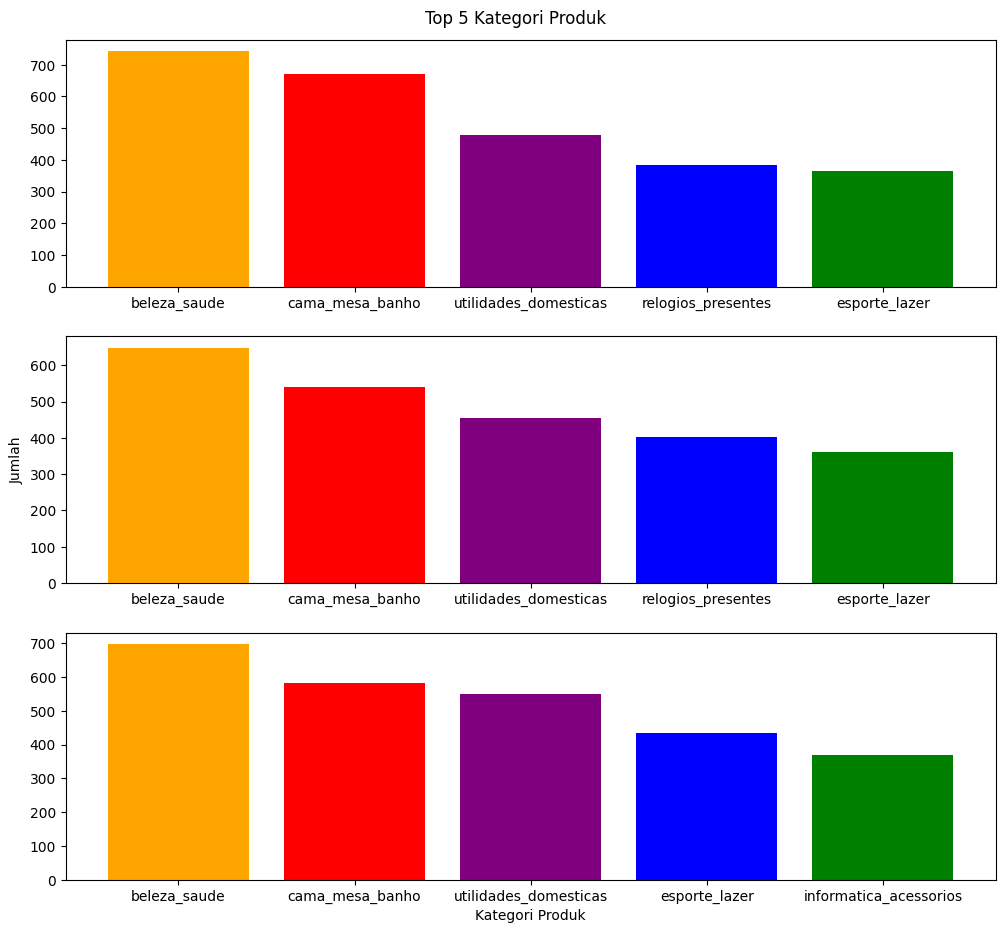

In [ ]:
fig = plt.figure(figsize = (12, 10))

plt.subplot(3, 1, 1)
plt.bar(list(df_b1['product_category_name'].value_counts().index[0:5]),
        df_b1['product_category_name'].value_counts()[0:5],
        color = ['orange', 'red', 'purple', 'blue', 'green'],
      )

plt.subplot(3, 1, 2)
plt.bar(list(df_b2['product_category_name'].value_counts().index[0:5]),
        df_b2['product_category_name'].value_counts()[0:5],
        color = ['orange', 'red', 'purple', 'blue', 'green'],
      )
plt.ylabel("Jumlah")
plt.subplot(3, 1, 3)
plt.bar(list(df_b3['product_category_name'].value_counts().index[0:5]),
        df_b3['product_category_name'].value_counts()[0:5],
        color = ['orange', 'red', 'purple', 'blue', 'green'],
      )

plt.xlabel("Kategori Produk")
fig.suptitle("Top 5 Kategori Produk")
fig.subplots_adjust(top=0.95)
plt.show()

Perhatikan bahwa pada bulan Juni dan Juli (Masing-masing grafik berada pada baris pertama dan kedua) memiliki kesamaan, yaitu pada kategori produk yang terpopuler untuk dibeli. Namun, perhatikan pada bulan Agustus (Grafik pada Baris Terakhir) bahwa terdapat perubahan kategori produk yang terpopuler. Pada bulan-bulan sebelumnya yang populer adalah esporte_lazer tetapi pada bulan selanjutnya terdapat tren baru dimana produk dengan kategori informatica_acessorios menjadi populer. Tidak ada dataset yang mendukung untuk mengetahui kenapa kategori tersebut populer. Kita bisa berasumsi bahwa terdapat tren lokal pada negara tersebut dimana masyarakat disana mulai untuk menyukai untuk melakukan modifikasi pada barang-barang elektronik dengan memasang aksesoris tertentu.

### Pertanyaan 2:

Untuk pertanyaan kedua, kita bisa menggunakan Pie Bar untuk merepresentasikan informasi yang sudah dieksplor pada tahap sebelumnya di EDA.

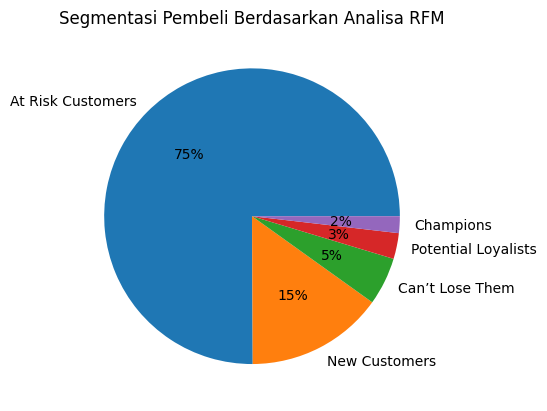

In [ ]:
plt.pie(final_merge.customer_segment.value_counts(),
        labels=final_merge.customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.title('Segmentasi Pembeli Berdasarkan Analisa RFM')
plt.show()

Perhatikan bahwa tipe pembeli dengan "At Risk Customer" mendominasi user pada platform E-Commerce tersebut sebesar 75% user. Kemudian, disusul dengan "tipe New Customer" 15% dan "Can't Lose Them" 5%. Untuk tipe "At Risk Customer", hal ini menyiratkan bahwa sebelumnya pembeli sering menjadi pelanggan yg sering berbelanja tetapi belum pernah membeli lagi sampai saat ini. Kemudian, terdapat tipe "New Cutomer" yang menyiratkan pembeli memiliki skor RFM yang tinggi tapi jarang membeli. Terakhir, terdapat tipe "Can't Lose Them" yang menyiratkan pelanggan sudah tidak melakukan transaksi lagi.

Hal ini berarti bahwa hasil analisa di atas adalah platform e-commerce tersebut jarang atau bahkan bisa saja tidak sama sekali memberikan apresiasi terhadap user yang sudah jadi pelanggan tetap pada periode waktu tertentu, seperti penawaran ekslusif, kupon diskon, rekomendasi barang yang berkaitan dengan preferensi pengguna, dan sebagainya. Hal ini bisa dibuktikan pada tipe "Champions" dan "Potential Loyalist" yang masing-masing memiliki user sebesar 2% dan 3%. Oleh karena itu, tindakan yang harus dilakukan adalah platform e-commerce harus memberikan *personalized campaigns*, rekomendasi yang sesuai dengan preferensinya, kupon diskon, *special offer*, dan memberikan *onboarding support*.

**Insight:**
- Untuk pertanyaan 1, pada 2 bulan pertama 5 kategori produk yang populer masih tetap sama tetapi berubah pada bulan Agustus dimana terdapat perubahan dimana kategori produk informatica_acessorios menjadi populer. Berdasarkan bulan tersebut, kita dapat menggunakan kategori tersebut untuk dijadikan produk terpopuler untuk tahun depan jika tidak ada tren baru.
- Untuk pertanyaan 2,  tipe pembeli dengan "At Risk Customer" mendominasi user pada platform E-Commerce tersebut sebesar 75% user. Kemudian, disusul dengan "tipe New Customer" 15% dan "Can't Lose Them" 5%. Hal ini menyiratkan bahwa strategi yang digunakan dalam meningkatkan transaksi atau keuntungan masih belum optimal dan harus segera ditindaklanjuti agar tidak kehilangan banyak user yang potensial.

## Conclusion

- Untuk pertanyaan 1, top 5 rekomendasi yang dapat ditampilkan di halaman utama website antara lain adalah beleze_saude, cama_besa_manho, utilidades_domesticas, esporte_lazer, dan informatica_acessorios untuk sementara ini. Berdasarkan hasil EDA menggunakan teknik statistika deskriptif, harga produk bukanlah menjadi patokan kenapa barang tersebut populer dan ada kemungkinan terdapat tren baru di negara tersebut yang membuat masyarakat membeli aksesoris untuk membuat alat elektroniknya menjadi lebih bagus.
- Untuk pertanyaan 2, tipe pembeli dengan "At Risk Customer" mendominasi user pada platform E-Commerce tersebut sebesar 75% user. Kemudian, disusul dengan "tipe New Customer" 15% dan "Can't Lose Them" 5%. Hal ini menyiratkan bahwa pembeli sudah mulai atau berpotensi meninggalkan platform tersebut karena mungkin platform tersebut tidak memberikan apresiasi atas user yang menggunakannya. Saran untuk menghadapi masalah ini adalah memberikan *personalized campaigns*, rekomendasi yang sesuai dengan preferensinya, kupon diskon, *special offer*, dan memberikan *onboarding support* dengan mempertimbangkan perilaku user.